# **Aircraft Predictive Maintenance**

# Introduction
a

In [38]:
# Importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import json

# Data Sources
a

In [2]:
# Defining Column Names

id_cols = ['unit', 'cycle'] # Identifiers
op_cols = ['op_setting_1', 'op_setting_2', 'op_setting_3'] # Operating conditions
sensor_cols = [f'sensor_{i}' for i in range(1, 22)] # Sensors 1-21

cols = id_cols + op_cols + sensor_cols

In [3]:
# Defining data file paths

train_path = '../data/cmapss/raw/train_FD001.txt'
test_path = '../data/cmapss/raw/test_FD001.txt'
rul_path = '../data/cmapss/raw/rul_FD001.txt'

## Train Data
a

In [4]:
# Loading the train data

df_train = pd.read_csv(train_path, sep=r'\s+', header=None)

df_train = df_train.iloc[:, :len(cols)]
df_train.columns = cols

df_train

,unit,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


In [5]:
# Checking df_train data types

df_train.dtypes

unit              int64
cycle             int64
op_setting_1    float64
op_setting_2    float64
op_setting_3    float64
sensor_1        float64
sensor_2        float64
sensor_3        float64
sensor_4        float64
sensor_5        float64
sensor_6        float64
sensor_7        float64
sensor_8        float64
sensor_9        float64
sensor_10       float64
sensor_11       float64
sensor_12       float64
sensor_13       float64
sensor_14       float64
sensor_15       float64
sensor_16       float64
sensor_17         int64
sensor_18         int64
sensor_19       float64
sensor_20       float64
sensor_21       float64
dtype: object

## Test Data
a

In [6]:
# Loading the test data

df_test = pd.read_csv(test_path, sep=r'\s+', header=None)

df_test = df_test.iloc[:, :len(cols)]
df_test.columns = cols

df_test

,unit,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,520.69,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,521.05,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,521.18,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,521.33,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699


In [7]:
# Checking df_test data types

df_test.dtypes

unit              int64
cycle             int64
op_setting_1    float64
op_setting_2    float64
op_setting_3    float64
sensor_1        float64
sensor_2        float64
sensor_3        float64
sensor_4        float64
sensor_5        float64
sensor_6        float64
sensor_7        float64
sensor_8        float64
sensor_9        float64
sensor_10       float64
sensor_11       float64
sensor_12       float64
sensor_13       float64
sensor_14       float64
sensor_15       float64
sensor_16       float64
sensor_17         int64
sensor_18         int64
sensor_19       float64
sensor_20       float64
sensor_21       float64
dtype: object

## RUL Data
a

In [8]:
# Loading the RUL data

df_rul = pd.read_csv(rul_path, header=None, names=['RUL'])

df_rul

,RUL
0,112
1,98
2,69
3,82
4,91
...,...
95,137
96,82
97,59
98,117


In [9]:
# Checking df_rul data types

df_rul.dtypes

RUL    int64
dtype: object

# Data Preprocessing
a

## Standardising Data Types
a

In [10]:
# Defining float and integer columns

int_cols = ['unit', 'cycle']
float_cols = [c for c in df_train.columns if c not in ['unit', 'cycle']]

In [11]:
# Converting identifier columns into integers and everything else into floats

df_train[int_cols] = df_train[int_cols].astype(int)
df_test[int_cols] = df_test[int_cols].astype(int)

df_train[float_cols] = df_train[float_cols].astype(float)
df_test[float_cols] = df_test[float_cols].astype(float)

In [12]:
# Confirming df_train data types

df_train.dtypes

unit              int32
cycle             int32
op_setting_1    float64
op_setting_2    float64
op_setting_3    float64
sensor_1        float64
sensor_2        float64
sensor_3        float64
sensor_4        float64
sensor_5        float64
sensor_6        float64
sensor_7        float64
sensor_8        float64
sensor_9        float64
sensor_10       float64
sensor_11       float64
sensor_12       float64
sensor_13       float64
sensor_14       float64
sensor_15       float64
sensor_16       float64
sensor_17       float64
sensor_18       float64
sensor_19       float64
sensor_20       float64
sensor_21       float64
dtype: object

In [13]:
# Confirming df_test data types

df_test.dtypes

unit              int32
cycle             int32
op_setting_1    float64
op_setting_2    float64
op_setting_3    float64
sensor_1        float64
sensor_2        float64
sensor_3        float64
sensor_4        float64
sensor_5        float64
sensor_6        float64
sensor_7        float64
sensor_8        float64
sensor_9        float64
sensor_10       float64
sensor_11       float64
sensor_12       float64
sensor_13       float64
sensor_14       float64
sensor_15       float64
sensor_16       float64
sensor_17       float64
sensor_18       float64
sensor_19       float64
sensor_20       float64
sensor_21       float64
dtype: object

## Sorting by Engine and Time
a

In [14]:
# Sorting df_train by engine and time

df_train = df_train.sort_values(['unit', 'cycle']).reset_index(drop=True)

df_train

,unit,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392.0,2388.0,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392.0,2388.0,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390.0,2388.0,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392.0,2388.0,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393.0,2388.0,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397.0,2388.0,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395.0,2388.0,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398.0,2388.0,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395.0,2388.0,100.0,38.29,23.0640


In [15]:
# Sorting df_test by engine and time

df_test = df_test.sort_values(['unit', 'cycle']).reset_index(drop=True)

df_test

,unit,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392.0,2388.0,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393.0,2388.0,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393.0,2388.0,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391.0,2388.0,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390.0,2388.0,100.0,38.99,23.4130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,520.69,2388.00,8213.28,8.4715,0.03,394.0,2388.0,100.0,38.65,23.1974
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,521.05,2388.09,8210.85,8.4512,0.03,395.0,2388.0,100.0,38.57,23.2771
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,521.18,2388.04,8217.24,8.4569,0.03,395.0,2388.0,100.0,38.62,23.2051
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,521.33,2388.08,8220.48,8.4711,0.03,395.0,2388.0,100.0,38.66,23.2699


## Duplicate Row Check
a

In [16]:
# Checking for duplicate rows

print(f'df_train Duplicates: {df_train.duplicated(subset=['unit', 'cycle']).sum()}')
print(f'df_test Duplicates: {df_test.duplicated(subset=['unit', 'cycle']).sum()}')

df_train Duplicates: 0
df_test Duplicates: 0


## Missing Value Check
a

In [17]:
# Checking for missing values in df_train

df_train.isna().sum().sort_values(ascending=False).head()

unit         0
cycle        0
sensor_20    0
sensor_19    0
sensor_18    0
dtype: int64

In [18]:
# Checking for missing values in df_test

df_test.isna().sum().sort_values(ascending=False).head()

unit         0
cycle        0
sensor_20    0
sensor_19    0
sensor_18    0
dtype: int64

# Creating the Remaining Useful Life (RUL) Target
a

## RUL for the Train Data
a
$$
RUL = \max(\text{cycle}_{\text{unit}}) - \text{cycle}
$$

In [19]:
# Creating the RUL target for the train data

max_cycle_train = df_train.groupby('unit')['cycle'].max()
df_train['RUL'] = df_train['unit'].map(max_cycle_train) - df_train['cycle']

df_train

,unit,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392.0,2388.0,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392.0,2388.0,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390.0,2388.0,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392.0,2388.0,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393.0,2388.0,100.0,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,2388.26,8137.60,8.4956,0.03,397.0,2388.0,100.0,38.49,22.9735,4
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,2388.22,8136.50,8.5139,0.03,395.0,2388.0,100.0,38.30,23.1594,3
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,2388.24,8141.05,8.5646,0.03,398.0,2388.0,100.0,38.44,22.9333,2
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,2388.23,8139.29,8.5389,0.03,395.0,2388.0,100.0,38.29,23.0640,1


## RUL for the Test Data
a
$$
RUL = RUL_{\text{end}} + \left(\max(\text{cycle}_{\text{test, unit}}) - \text{cycle}\right)
$$

In [20]:
# Adding a column for units to df_rul

df_rul['unit'] = df_rul.index + 1

df_rul

,RUL,unit
0,112,1
1,98,2
2,69,3
3,82,4
4,91,5
...,...,...
95,137,96
96,82,97
97,59,98
98,117,99


In [21]:
# Calculating the maximum observed cycle for the test data

max_cycle_test = df_test.groupby('unit')['cycle'].max()

In [22]:
# Merging and creating the RUL target for the test data

df_test = df_test.merge(max_cycle_test.rename('max_cycle'), on='unit', how='left')
df_test = df_test.merge(df_rul, on='unit', how='left')

df_test['RUL'] = df_test['RUL'] + (df_test['max_cycle'] - df_test['cycle'])

df_test.drop(columns=['max_cycle'], inplace=True)

df_test

,unit,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,RUL
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,2388.03,8125.55,8.4052,0.03,392.0,2388.0,100.0,38.86,23.3735,142
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,2388.06,8139.62,8.3803,0.03,393.0,2388.0,100.0,39.02,23.3916,141
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,2388.03,8130.10,8.4441,0.03,393.0,2388.0,100.0,39.08,23.4166,140
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,2388.05,8132.90,8.3917,0.03,391.0,2388.0,100.0,39.00,23.3737,139
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,2388.03,8129.54,8.4031,0.03,390.0,2388.0,100.0,38.99,23.4130,138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,2388.00,8213.28,8.4715,0.03,394.0,2388.0,100.0,38.65,23.1974,24
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,2388.09,8210.85,8.4512,0.03,395.0,2388.0,100.0,38.57,23.2771,23
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,2388.04,8217.24,8.4569,0.03,395.0,2388.0,100.0,38.62,23.2051,22
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,2388.08,8220.48,8.4711,0.03,395.0,2388.0,100.0,38.66,23.2699,21


## Checks
a

### Train Data Minimum RUL Check
a

In [23]:
# Checking descriptive statistics of the RUL for the train data

df_train['RUL'].describe()

count    20631.000000
mean       107.807862
std         68.880990
min          0.000000
25%         51.000000
50%        103.000000
75%        155.000000
max        361.000000
Name: RUL, dtype: float64

[min being 0]

### Test Data Minimum RUL Check
a

In [27]:
# Checking the minimum value of the RUL for the test data

df_test.groupby('unit')['RUL'].min()

unit
1      112
2       98
3       69
4       82
5       91
      ... 
96     137
97      82
98      59
99     117
100     20
Name: RUL, Length: 100, dtype: int64

[RUL not being 0]

### Checking the Last Timestep per Unit
a

In [28]:
# Checking the last timestep per unit

df_test.loc[df_test.groupby('unit')['cycle'].idxmax(), ['unit', 'cycle', 'RUL']]

,unit,cycle,RUL
30,1,31,112
79,2,49,98
205,3,126,69
311,4,106,82
409,5,98,91
...,...,...,...
12545,96,97,137
12679,97,134,82
12800,98,121,59
12897,99,97,117


[RUL matching values in df_rul]

## RUL Degradation Visualisation
a

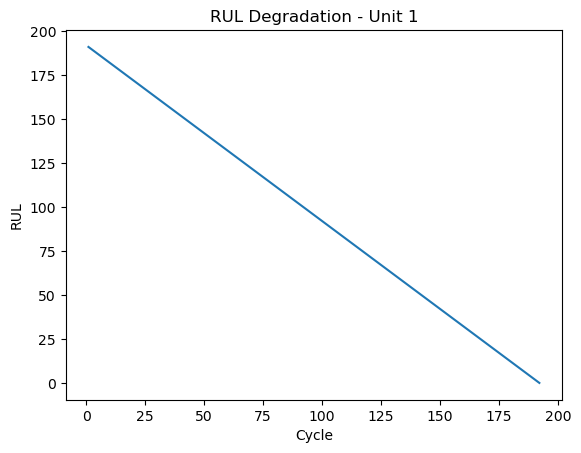

In [30]:
# Visualising RUL degradation

unit_example = 1

subset = df_train[df_train['unit'] == unit_example]

plt.plot(subset['cycle'], subset['RUL'])
plt.xlabel('Cycle')
plt.ylabel('RUL')
plt.title(f'RUL Degradation - Unit {unit_example}')
plt.show()

[straight line going to 0]

# RUL Capping
a

In [32]:
# Capping the RUL

RUL_CAP = 125

df_train['RUL_capped'] = df_train['RUL'].clip(upper=RUL_CAP)
df_test['RUL_capped'] = df_test['RUL'].clip(upper=RUL_CAP)

print(df_train['RUL'].max(), df_train['RUL_capped'].max())
print(df_test['RUL'].max(), df_test['RUL_capped'].max())

361 125
340 125


# Checking for Near-Constant Features
a

In [ ]:
# Identifying low-variance columns on df_train

feature_cols = [c for c in df_train.columns if c.startswith('op_setting_') or c.startswith('sensor_')]

variances = df_train[feature_cols].var()
low_var_cols = variances[variances < 1e-8].index.tolist()

print(f'Low-Variance Columns: {low_var_cols}')
print(f'Count: {len(low_var_cols)}')

Low-Variance Columns: ['op_setting_3', 'sensor_1', 'sensor_5', 'sensor_10', 'sensor_16', 'sensor_18', 'sensor_19']
Count: 7


In [34]:
# Dropping low-variance columns from df_train and df_test

df_train = df_train.drop(columns=low_var_cols)
df_test = df_test.drop(columns=low_var_cols)

In [39]:
# Saving the list of low-variance columns for reproducibility

with open('../data/cmapss/processed/dropped_low_variance_columns.json', 'w') as f:
    json.dump(low_var_cols, f, indent=2)